*data and tutorial provided by [Cloud Academy](https://github.com/cloudacademy/data-visualization-with-python-using-matplotlib)*
# $Data$ $Visualization$ $with$ $Python$

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Part One: Introduction to Matplotlib

* Use the pandas.read_csv() method to load the gapminder.csv as a dataframe df
* Create a new dataset of df_usa by querying df to only include data from the USA
* Plot the df_usa dataset with 'Year' as the x-axis and 'GDP' as the y-axis

In [2]:
df = pd.read_csv('./data/gapminder.csv')
df_usa = df.query("Country == 'United States'").reset_index(drop=True)

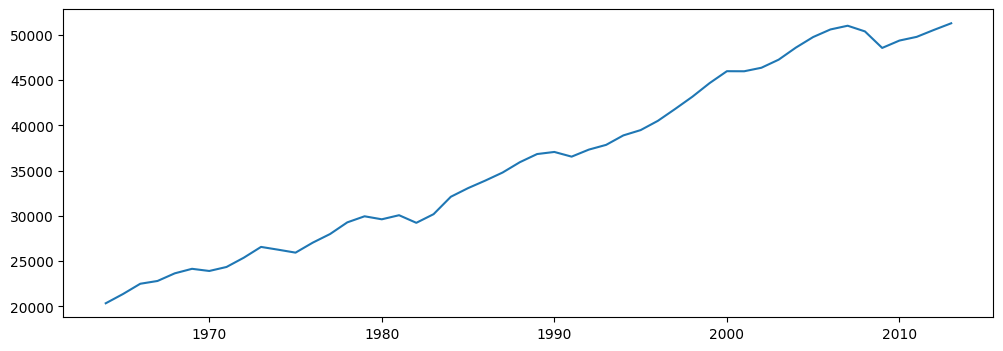

In [3]:
fig, ax = plt.subplots(figsize=[12, 4])
ax.plot(df_usa['Year'], df_usa['gdp'])
plt.show()

## Part Two: Customisation in Matplotlib

* Change the linestyle of the df_usa plot to be red dashes and add a label of 'USA'
* Change the xticks (markers on the x-axis) to be every 6 years
* Add labels to each axis as well as a title
* Add a legend to the plot

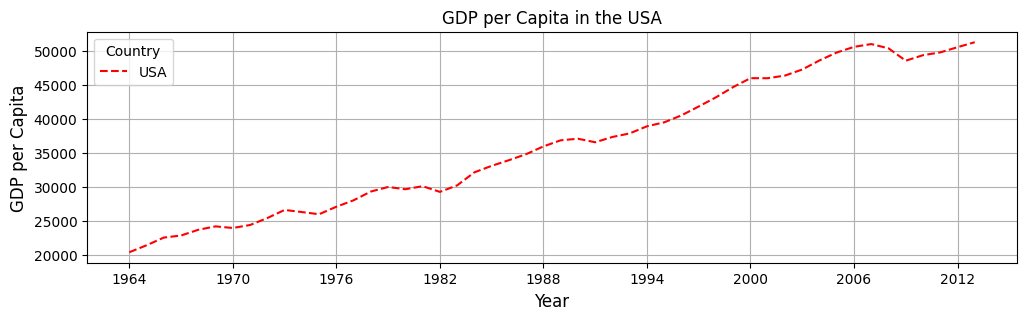

In [4]:
fig, ax = plt.subplots(figsize=[12, 3])
ax.plot(df_usa['Year'], df_usa['gdp'], linestyle='--', color='r', label='USA')
ax.set_xticks(
    list(range(df_usa['Year'].min(), df_usa['Year'].max()+1, 6))
)
ax.set_xlabel('Year', fontdict={'size': 12})
ax.set_ylabel('GDP per Capita', fontdict={'size': 12})
ax.set_title('GDP per Capita in the USA')
ax.legend(title='Country')
plt.grid(True)
plt.show()

## Part Three: Multiple Plots

* Create a new dataset df_china from df including only data from China
* Plot the df_china dataset alongside the df_usa dataset as seperate rows of the same plot, each with their own labels, legend, and line style
* Plot df_usa and df_china on the same plot but with seperate scales on the y-axis
* Create a legend for this new figure indicating which line relates to which country

In [5]:
df_china = df.query("Country == 'China'").reset_index(drop=True)

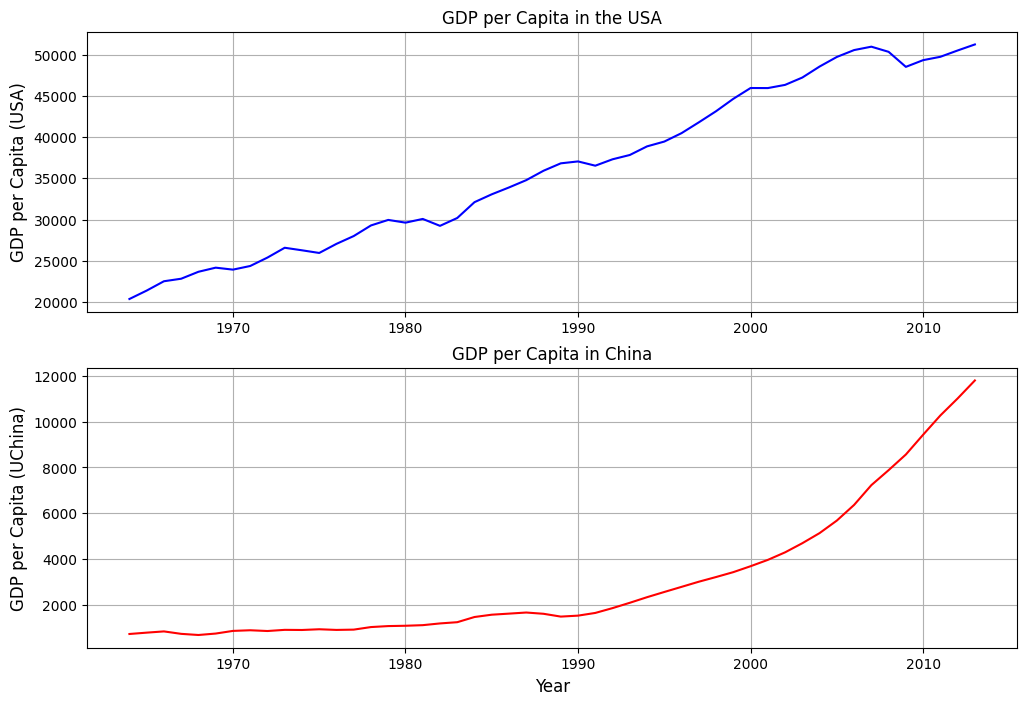

In [6]:
fig, ax = plt.subplots(figsize=[12, 8], nrows=2, ncols=1)
ax[0].plot(df_usa['Year'], df_usa['gdp'], linestyle='-', color='b', label='USA')
ax[1].plot(df_china['Year'], df_china['gdp'], linestyle='-', color='r', label='China')
ax[1].set_xlabel('Year', fontdict={'size': 12})
ax[0].set_ylabel('GDP per Capita (USA)', fontdict={'size': 12})
ax[1].set_ylabel('GDP per Capita (UChina)', fontdict={'size': 12})
ax[0].set_title('GDP per Capita in the USA')
ax[1].set_title('GDP per Capita in China')
ax[0].grid(True)
ax[1].grid(True)
plt.show()

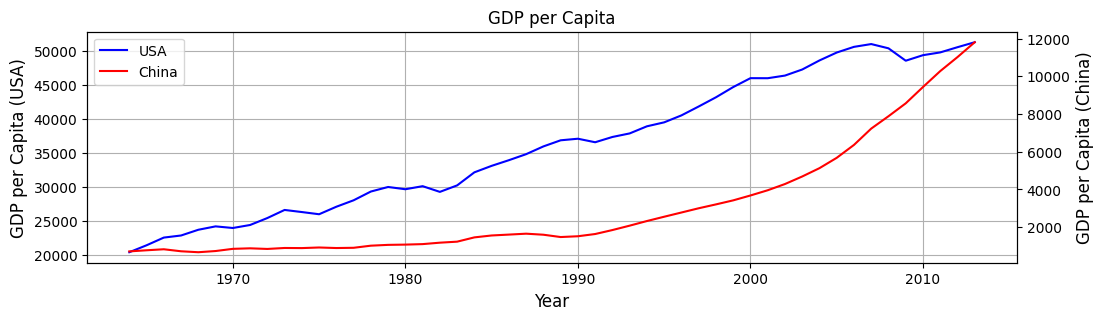

In [7]:
fig, ax = plt.subplots(figsize=[12, 3])
ax.plot(df_usa['Year'], df_usa['gdp'], linestyle='-', color='b', label='USA')
ax.set_xlabel('Year', fontdict={'size': 12})
ax.set_ylabel('GDP per Capita (USA)', fontdict={'size': 12})
ax.set_title('GDP per Capita')
ax2 = ax.twinx()
ax2.plot(df_china['Year'], df_china['gdp'], linestyle='-', color='r', label='China')
ax2.set_ylabel('GDP per Capita (China)', fontdict={'size': 12})
ax.grid(True)
lines, handles = ax.get_legend_handles_labels()
lines2, handles2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, handles + handles2)
plt.show()

## Part Four: Annotating Text

* Step one

In [8]:
df_china.head()

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,China,1964,6.120,53.32072,696171650.0,130.77,713.0,East Asia & Pacific
1,China,1965,6.022,55.64680,710290299.0,115.43,772.0,East Asia & Pacific
2,China,1966,6.211,56.80320,727601056.0,120.80,826.0,East Asia & Pacific
3,China,1967,5.252,58.38112,747678772.0,126.42,719.0,East Asia & Pacific
4,China,1968,6.370,59.40520,769666505.0,132.30,669.0,East Asia & Pacific
